### Training and Visualization of a Decision Tree

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [4]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

In [31]:
tree = DecisionTreeClassifier(max_depth=10, random_state=45)

In [32]:
tree.fit(X, y)

DecisionTreeClassifier(max_depth=10, random_state=45)

In [7]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Purushotham\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [33]:
from graphviz import Source

In [34]:
from sklearn.tree import export_graphviz

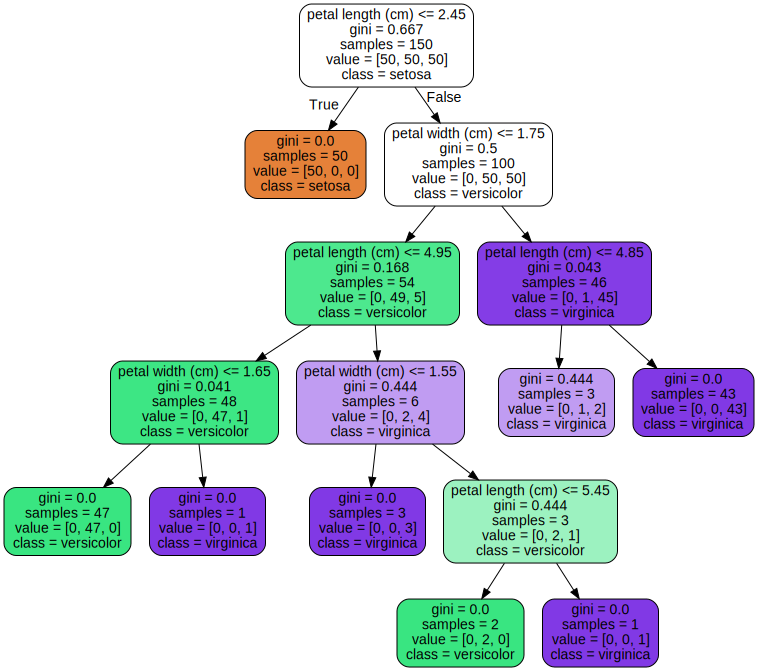

In [35]:
export_graphviz(
    tree,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    filled=True,
    rounded=True
)

Source.from_file("iris_tree.dot")

### Decision Tree as a Regression

In [37]:
import numpy as np
np.random.seed(45)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m,1)/20

In [38]:
X

array([[0.98901151],
       [0.54954473],
       [0.2814473 ],
       [0.07728957],
       [0.4444695 ],
       [0.47280797],
       [0.048522  ],
       [0.16332445],
       [0.11595071],
       [0.62739168],
       [0.85618205],
       [0.65010242],
       [0.99072168],
       [0.47035075],
       [0.61829448],
       [0.28266721],
       [0.97600332],
       [0.673068  ],
       [0.44053089],
       [0.28968734],
       [0.50969968],
       [0.1124609 ],
       [0.22695479],
       [0.4785523 ],
       [0.24275816],
       [0.38798252],
       [0.81887343],
       [0.07454079],
       [0.92314954],
       [0.22489608],
       [0.70637148],
       [0.11056546],
       [0.60100412],
       [0.40679254],
       [0.83682945],
       [0.25003043],
       [0.45773799],
       [0.5574327 ],
       [0.2519502 ],
       [0.11024132],
       [0.7266372 ],
       [0.31007394],
       [0.82575397],
       [0.45166653],
       [0.09413893],
       [0.88720324],
       [0.74175413],
       [0.121

In [39]:
y

array([[ 1.00842037e+00],
       [ 8.08941421e-02],
       [ 2.10808734e-01],
       [ 7.21733215e-01],
       [ 2.56160730e-02],
       [ 4.56263450e-02],
       [ 8.10251971e-01],
       [ 5.14143147e-01],
       [ 6.44729678e-01],
       [ 7.14965936e-02],
       [ 4.87390561e-01],
       [ 1.55540915e-01],
       [ 9.16664227e-01],
       [-2.55798645e-02],
       [-9.72067930e-04],
       [ 1.62728966e-01],
       [ 9.62500815e-01],
       [ 1.46538738e-01],
       [ 2.41594985e-02],
       [ 2.00930376e-01],
       [ 6.55111761e-02],
       [ 5.79641949e-01],
       [ 3.22046405e-01],
       [ 2.74978437e-02],
       [ 2.55554513e-01],
       [ 1.03498242e-02],
       [ 3.35148083e-01],
       [ 6.55475263e-01],
       [ 6.91094056e-01],
       [ 3.37478200e-01],
       [ 1.92659302e-01],
       [ 6.90578536e-01],
       [ 2.48735951e-02],
       [ 7.87127159e-02],
       [ 4.06902217e-01],
       [ 2.94798405e-01],
       [ 1.15369713e-02],
       [ 7.24655780e-02],
       [ 2.4

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
tree1 = DecisionTreeRegressor(random_state=55)
tree2 = DecisionTreeRegressor(random_state=100, min_samples_leaf=7)
tree1.fit(X, y)
tree2.fit(X, y)

DecisionTreeRegressor(min_samples_leaf=7, random_state=100)

Text(0.5, 1.0, 'max_depth=3')

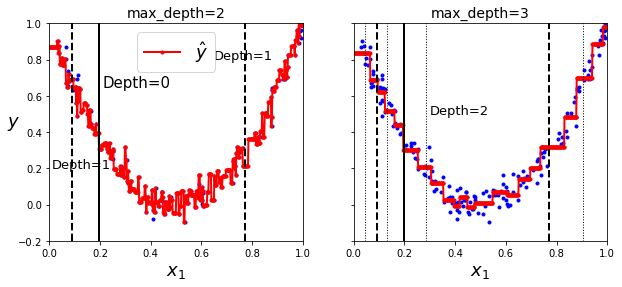

In [70]:
import matplotlib.pyplot as plt
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_regression_predictions(tree1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)